# Exploratory Analysis - United Nation Annual Population Report

* Original Author: PacktPublishing
* Editor&Contributor: Tonghong Chen
* Data Source1: http://www.un.org/en/development/desa/population/
* Data Source2: https://www.quandl.com/ 

# Part I: Explorative Analysis - Global Population

## Data Preparation

In [1]:
import pandas as pd                  
import numpy as np
# Data Source: Annual Population by Age and Sex - Department of Economic and Social Affairs, United Nations
population_df = pd.read_csv("WPP2015_DB04_Population_Annual.zip", header=0, compression='zip',encoding='latin_1')   
population_df.head() # Show the first five rows of the DataFrame

,LocID,Location,VarID,Variant,Time,MidPeriod,SexID,Sex,AgeGrp,AgeGrpStart,AgeGrpSpan,Value
0,4,Afghanistan,2,Medium,1950,1950.5,1,Male,0-4,0,5,630.044
1,4,Afghanistan,2,Medium,1950,1950.5,1,Male,5-9,5,5,516.205
2,4,Afghanistan,2,Medium,1950,1950.5,1,Male,10-14,10,5,461.378
3,4,Afghanistan,2,Medium,1950,1950.5,1,Male,15-19,15,5,414.368
4,4,Afghanistan,2,Medium,1950,1950.5,1,Male,20-24,20,5,374.110


# Line Chart & Stacked Area Chart

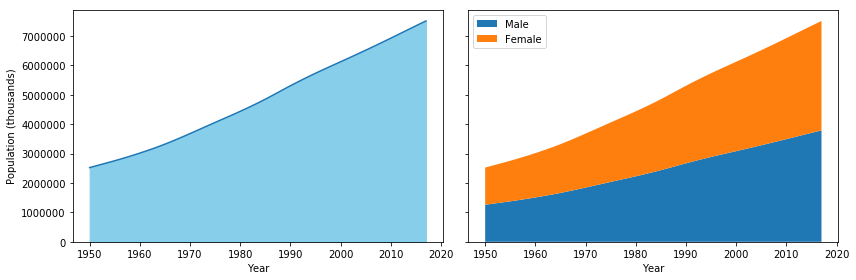

In [2]:
import matplotlib.pyplot as plt
# Select the aggregated population data from the world for both and each gender, during 1950 to 2017.
both_data = population_df[(population_df.Location == 'WORLD') & 
                              (population_df.Sex == 'Both') & 
                              (population_df.Time <= 2017) ]
male_data = population_df[(population_df.Location == 'WORLD') & 
                          (population_df.Sex == 'Male') & 
                          (population_df.Time <= 2017)]
female_data = population_df[(population_df.Location == 'WORLD') & 
                            (population_df.Sex == 'Female') & 
                            (population_df.Time <= 2017)]

# Calculate aggregated population data across all age groups for each year 
# Set as_index=False to avoid the Time variable to be used as index
# as_index=False is effectively “SQL-style” grouped output
grouped_data = both_data.groupby('Time', as_index=False).sum()
grouped_male_data = male_data.groupby('Time', as_index=False).sum()
grouped_female_data = female_data.groupby('Time', as_index=False).sum()

# Create two subplots with shared y-axis (sharey=True)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True)

# Generate a simple line plot of population vs time
ax1.plot(grouped_data.Time, grouped_data.Value)
# Shade the area under the line in sky blue
ax1.fill_between(x=grouped_data.Time, y1=grouped_data.Value, color='skyblue')

# Set the axis label
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (thousands)')

# Generate a stacked area plot of population vs time
ax2.stackplot(grouped_male_data.Time, grouped_male_data.Value, grouped_female_data.Value)

# Add a figure legend
ax2.legend(['Male', 'Female'], loc='upper left')

# Set the x-axis label only this time
ax2.set_xlabel('Year')

plt.tight_layout()
#plt.savefig("Section_04_area.png", dpi=300)
plt.show()

# Pie Chart

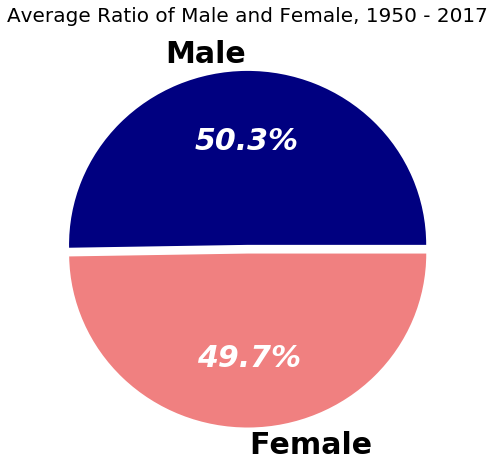

In [3]:
import matplotlib.pyplot as plt

# Prepare the data
male_mean = grouped_male_data['Value'].mean()
female_mean = grouped_female_data['Value'].mean()
m_perc = male_mean/(male_mean+female_mean)
f_perc = female_mean/(male_mean+female_mean)

# Prepare the colors and labels
colors  = ['navy','lightcoral']
labels = ["Male","Female"]

plt.figure(figsize=(8,8))

## Plot the Pie Chart
patches, texts, autotexts = plt.pie([m_perc,f_perc],labels=labels,autopct='%1.1f%%',\
                            explode=[0,0.05], startangle=0, colors=colors)

plt.title('Average Ratio of Male and Female, 1950 - 2017',fontsize=20)

# Format the text labels (resize, change style)
for text in texts+autotexts:
    text.set_fontsize(30)
    text.set_fontweight('bold')

for text in autotexts:
    text.set_color('white')
    text.set_fontstyle('italic')
    
plt.show()

# Bar Chart

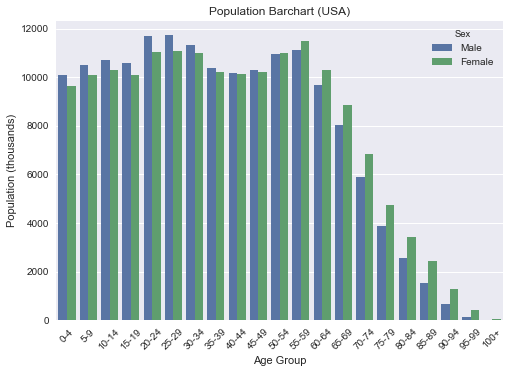

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract USA population data in 2017
current_population = population_df[(population_df.Location == 'United States of America') & 
                                   (population_df.Time == 2017) &
                                   (population_df.Sex != 'Both')]

# Population Bar chart 
sns.barplot(x="AgeGrp",y="Value", hue="Sex", data = current_population)

# Use Matplotlib functions to label axes rotate tick labels
ax = plt.gca()
ax.set(xlabel="Age Group", ylabel="Population (thousands)")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
plt.title("Population Barchart (USA)")

# Show the figure
#plt.savefig("Section_04_usa_population_bar.png", dpi=300)
plt.show()

# Pyramid Chart

### USA Population - Stable Structure

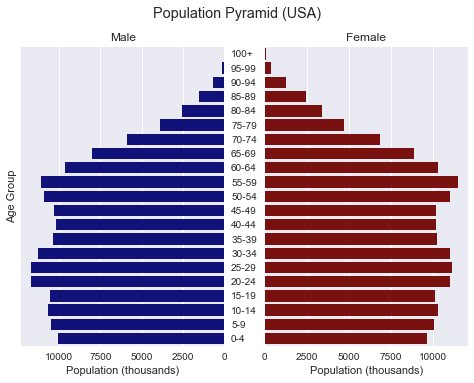

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# Extract USA population data in 2017
current_population = population_df[(population_df.Location == 'United States of America') & 
                                   (population_df.Time == 2017) &
                                   (population_df.Sex != 'Both')]

# Reverse the dataframe to change the age group to descending order
current_population = current_population.iloc[::-1]

# Create two subplots with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

# Bar chart for male
sns.barplot(x="Value",y="AgeGrp", color="darkblue", ax=axes[0],
            data = current_population[(current_population.Sex == 'Male')])
# Bar chart for female
sns.barplot(x="Value",y="AgeGrp", color="darkred", ax=axes[1],
            data = current_population[(current_population.Sex == 'Female')])

# Use Matplotlib function to invert the first chart
axes[0].invert_xaxis()

# Use Matplotlib function to show tick labels in the middle
axes[0].yaxis.tick_right()

# Use Matplotlib functions to label the axes and titles
axes[0].set_title("Male")
axes[1].set_title("Female")
axes[0].set(xlabel="Population (thousands)", ylabel="Age Group")
axes[1].set(xlabel="Population (thousands)", ylabel="")
fig.suptitle("Population Pyramid (USA)")

# Show the figure
# plt.savefig("Section_04_pyramid.png", dpi=300)
plt.show()

### Cambodia Population - Expansive Structure

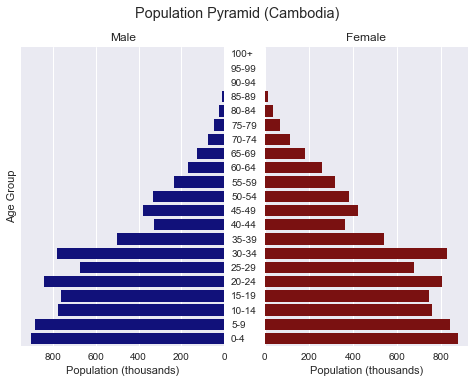

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Extract USA population data in 2017
current_population = population_df[(population_df.Location == 'Cambodia') & 
                                   (population_df.Time == 2017) &
                                   (population_df.Sex != 'Both')]

# Change the age group to descending order
current_population = current_population.iloc[::-1]

# Create two subplots with shared y-axis
fig, axes = plt.subplots(ncols=2, sharey=True)

# Bar chart for male
sns.barplot(x="Value",y="AgeGrp", color="darkblue", ax=axes[0],
            data = current_population[(current_population.Sex == 'Male')])
# Bar chart for female
sns.barplot(x="Value",y="AgeGrp", color="darkred", ax=axes[1],
            data = current_population[(current_population.Sex == 'Female')])

# Use Matplotlib function to invert the first chart
axes[0].invert_xaxis()

# Use Matplotlib function to show tick labels in the middle
axes[0].yaxis.tick_right()

# Use Matplotlib functions to label the axes and titles
axes[0].set_title("Male")
axes[1].set_title("Female")
axes[0].set(xlabel="Population (thousands)", ylabel="Age Group")
axes[1].set(xlabel="Population (thousands)", ylabel="")
fig.suptitle("Population Pyramid (Cambodia)")

# Show the figure
# plt.savefig("Section_04_pyramid.png", dpi=300)
plt.show()

### Japan Population - Constrictive Structure

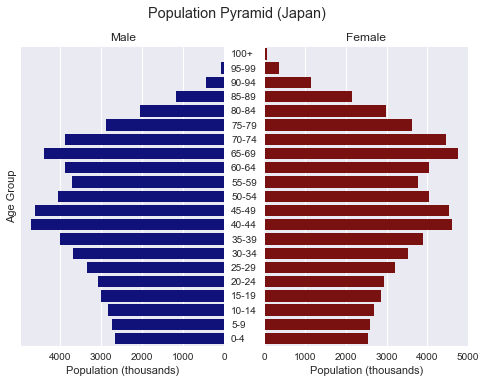

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Extract USA population data in 2017
current_population = population_df[(population_df.Location == 'Japan') & 
                                   (population_df.Time == 2017) &
                                   (population_df.Sex != 'Both')]

# Change the age group to descending order
current_population = current_population.iloc[::-1]

# Create two subplots with shared y-axis
fig, axes = plt.subplots(ncols=2, sharey=True)

# Bar chart for male
sns.barplot(x="Value",y="AgeGrp", color="darkblue", ax=axes[0],
            data = current_population[(current_population.Sex == 'Male')])
# Bar chart for female
sns.barplot(x="Value",y="AgeGrp", color="darkred", ax=axes[1],
            data = current_population[(current_population.Sex == 'Female')])

# Use Matplotlib function to invert the first chart
axes[0].invert_xaxis()

# Use Matplotlib function to show tick labels in the middle
axes[0].yaxis.tick_right()

# Use Matplotlib functions to label the axes and titles
axes[0].set_title("Male")
axes[1].set_title("Female")
axes[0].set(xlabel="Population (thousands)", ylabel="Age Group")
axes[1].set(xlabel="Population (thousands)", ylabel="")
fig.suptitle("Population Pyramid (Japan)")

# Show the figure
# plt.savefig("Section_04_pyramid.png", dpi=300)
plt.show()

# Part II: Numerical Visualization -  Population V.S. BigMac Price

![title](http://www.mcdonalds.eg/sitefiles/staticpage_bannerpics/banner_229.jpg)

The Big Mac index, also known as Big Mac PPP, is a survey done by The Economist magazine that is used to measure the purchasing power parity. The following dataset includes all country's Economics data related to Big Mac Index from 2000 - 2017 (two records/year, and totally 34 records/country)

### Get the BigMac Index Data from Quandl (here I've saved it to local)

In [8]:
import pandas as pd
bigmac_df = pd.read_csv("bigmac_df.csv")
bigmac_df.head()

,Date,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation,country
0,2017-07-31,5.90,1.303016,4.527955,1.113208,-14.566887,-11.701246,-13.026250,2.584216,19.941711,-2.357724,AUS
1,2017-01-31,5.80,1.356668,4.275180,1.146245,-15.510277,-11.923378,-10.263571,7.437710,9.996884,-5.824339,AUS
2,2016-07-31,5.75,1.335738,4.304737,1.140873,-14.588542,-11.023577,-12.479627,2.480650,4.397763,-2.681003,AUS
3,2016-01-31,5.30,1.415729,3.743655,1.075051,-24.063793,-28.164064,-22.286403,-22.293014,-4.004199,-20.675480,AUS
4,2015-07-31,5.30,1.351260,3.922265,1.106472,-18.115553,-22.169093,-18.572959,-23.192558,6.938929,-14.171058,AUS


# Histogram and Distribution

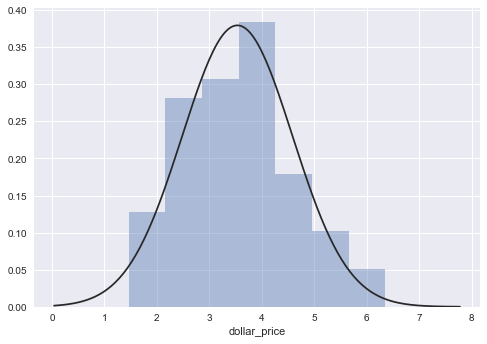

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Get the BigMac price index in 2017
current_bigmac = bigmac_df[(bigmac_df.Date == "2017-01-31")]

# Plot the histogram, turn off KDE curve, and fit a normal distribution over the data
ax = sns.distplot(current_bigmac.dollar_price, kde=False, fit=stats.norm)
# plt.savefig("Section_04_norm_distplot.png", dpi=300)
plt.show()

### Continue to get the GDP per Capita from Quandl (here I've saved it to local)

* The BigMac indexes alone incidate nothing about the country's economy. And they are not comparable between countries
* We would like to go on and explore the relationship between BigMac pricing and GDP per Capita. 
* We continue to acquire GDP per Capita from Quandl's World Bank World Development Indicators - WWDI dataset

In [10]:
import pandas as pd
gdp_df=pd.read_csv("gdp_df.csv")
gdp_df.head()

,Date,Value,country
0,2016-12-31,55670.924143,AUS
1,2015-12-31,54941.911458,AUS
2,2014-12-31,54394.334266,AUS
3,2013-12-31,53798.358506,AUS
4,2012-12-31,53348.388969,AUS


___The most recent record in WWDI's GDP per Capita dataset was collected at the end of 2016.___

___Let's join the latest GDP per Capita data with with the cooresponding Big Mac Index dataset in the same fiscal year___

In [11]:
merged_df = pd.merge(bigmac_df[(bigmac_df.Date == "2017-01-31")], \
                     gdp_df[(gdp_df.Date == "2016-12-31")], how='inner', on='country')
merged_df.head()

,Date_x,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation,country,Date_y,Value
0,2017-01-31,5.80,1.356668,4.275180,1.146245,-15.510277,-11.923378,-10.263571,7.437710,9.996884,-5.824339,AUS,2016-12-31,55670.924143
1,2017-01-31,16.50,3.223950,5.117945,3.260870,1.145166,67.550945,70.708447,104.382154,109.250553,79.153340,BRA,2016-12-31,10826.271435
2,2017-01-31,3.09,0.828775,3.728394,0.610672,-26.316324,-18.020756,-16.475855,0.000000,2.382008,-12.343942,GBR,2016-12-31,41954.737517
3,2017-01-31,2450.00,672.805000,3.641471,484.189723,-28.034167,11.931901,14.041261,36.536880,39.789198,19.682847,CHL,2016-12-31,15019.632965
4,2017-01-31,55.00,15.857500,3.468390,10.869565,-31.454736,6.267148,8.269755,29.626894,32.714617,13.625826,ARG,2016-12-31,10153.997912


___Now we are going to explore the relationship between BigMac Pricing and GDP per Capita___

# Scatter Plot

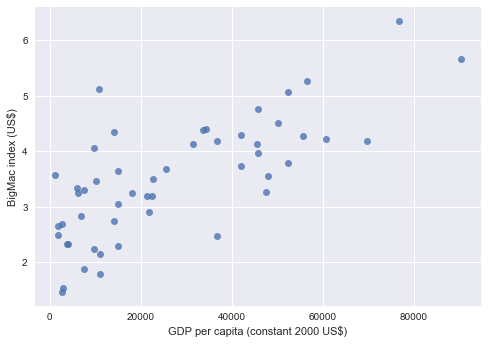

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn.regplot() returns matplotlib.Axes object
ax = sns.regplot(x="Value", y="dollar_price", data=merged_df, fit_reg=False)
ax.set_xlabel("GDP per capita (constant 2000 US$)")
ax.set_ylabel("BigMac index (US$)")

#plt.savefig("Section_04_simple_scatter.png", dpi=300)
plt.show()

# Regression Plot

regplot will plot the scatter and fit a linear regression line, with its 95% CI band

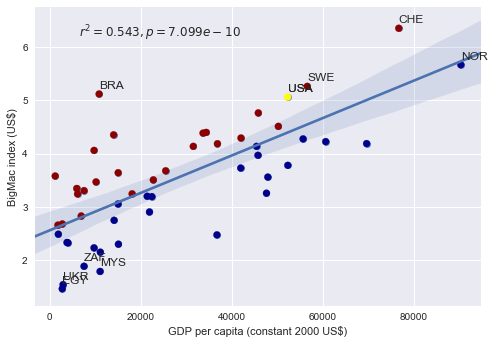

In [13]:
from scipy.stats import linregress

# Plot the Regression plot
ax = sns.regplot(x="Value", y="dollar_price", data=merged_df)
ax.set_xlabel("GDP per capita (constant 2000 US$)")
ax.set_ylabel("BigMac index (US$)")

# Calculate linear regression parameters
slope, intercept, r_value, p_value, std_err = linregress(merged_df.Value, merged_df.dollar_price)

colors = []
for row in merged_df.itertuples():
     # Highlight the markers with different colors   
     # Highlight the marker that corresponds to China
    if row.country == "USA":
        t = ax.text(row.Value,row.dollar_price+0.1,row.country)
        color = "yellow"    
    elif row.dollar_price > row.Value * slope + intercept:
        # Color markers as darkred if they are above the regression line
        color = "darkred"
    else:
        # Color markers as darkblue if they are below the regression line
        color = "darkblue"
    
    # Label the country code for those who demonstrate extreme BigMac index
    if row.dollar_price >= 5 or row.dollar_price <= 2:
        ax.text(row.Value,row.dollar_price+0.1,row.country)
        
    colors.append(color)

# Overlay another scatter plot on top with marker-specific color
ax.scatter(merged_df.Value, merged_df.dollar_price, c=colors)


# Label the r squared value and p value of the linear regression model.
# transform=ax.transAxes indicates that the coordinates are given relative to the axes bounding box, 
# with 0,0 being the lower left of the axes and 1,1 the upper right.
ax.text(0.1, 0.9, "$r^2={0:.3f}, p={1:.3e}$".format(r_value ** 2, p_value), transform=ax.transAxes)

# plt.savefig("Section_04_scatter_colored.png", dpi=300)
plt.show()

___From the above plot, it seems that BigMac Index has a positive linear relationship with GDP per Capita___

# Join Plot

___We can also join different plots to better visualize the relationship between GDP per Capita and BigMac Index___

### Style 1: Scatter + Histogram

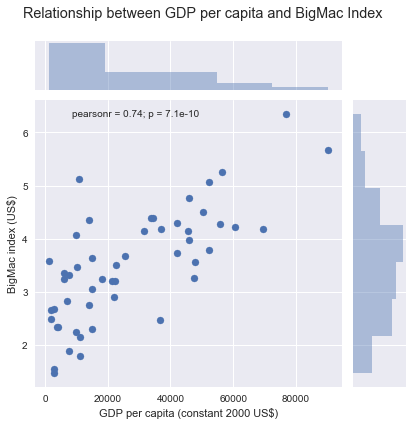

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# seaborn.jointplot() returns a seaborn.JointGrid object
g = sns.jointplot(x="Value", y="dollar_price", data=merged_df)
# Provide custom axes labels through accessing the underlying axes object
# We can get matplotlib.axes.Axes of the scatter plot by calling g.ax_joint
g.ax_joint.set_xlabel("GDP per capita (constant 2000 US$)")
g.ax_joint.set_ylabel("BigMac index (US$)")

# Set the title and adjust the margin
g.fig.suptitle("Relationship between GDP per capita and BigMac Index")
g.fig.subplots_adjust(top=0.9)
# plt.savefig("Section_04_jointplot_scatter.png", dpi=300)
plt.show()

### Style 2: Contour + KDE

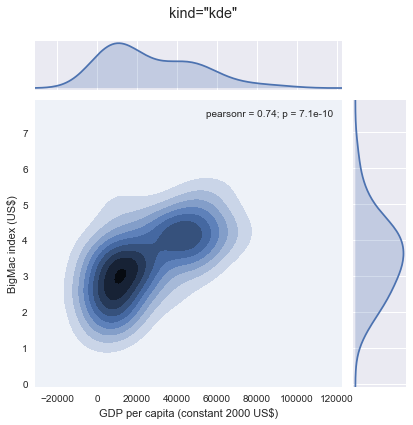

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn.jointplot() returns a seaborn.JointGrid object
g = sns.jointplot(x="Value", y="dollar_price", data=merged_df, kind="kde")

# Provide custom axes labels through accessing the underlying axes object
g.ax_joint.set_xlabel("GDP per capita (constant 2000 US$)")
g.ax_joint.set_ylabel("BigMac index (US$)")
g.fig.suptitle('kind="kde"')
g.fig.subplots_adjust(top=0.9)
# plt.savefig("Section_04_jointplot_kde.png", dpi=300)
plt.show()

### Style 3: Hex + Histogram

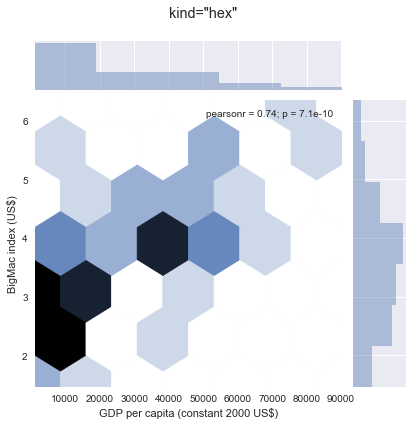

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# seaborn.jointplot() returns a seaborn.JointGrid object
g = sns.jointplot(x="Value", y="dollar_price", data=merged_df, kind="hex")

# Provide custom axes labels through accessing the underlying axes object
g.ax_joint.set_xlabel("GDP per capita (constant 2000 US$)")
g.ax_joint.set_ylabel("BigMac index (US$)")
g.fig.suptitle('kind="hex"')
g.fig.subplots_adjust(top=0.9)
# plt.savefig("Section_04_jointplot_kde.png", dpi=300)
plt.show()

# Part III: Categorical Visualization -  Population Types V.S.  BigMac Index Distributions

__Previously, we talked about Population Types (constrictive, stable, expansive) a little bit. Are you curious about the relationship between the population type and BigMac price?__

__Before digging into the visualization part, we first need to create a new fature "country" for the population_df dataset, so that it can be joined with other datset__

In [17]:
from pycountry import countries

def get_alpha_3(location):
    """
    Convert full country name to three letter code (ISO 3166 alpha-3)
    
    Args:
        location: Full location name
    Returns:
        three letter code or None if not found
    """  
    try:
        return countries.get(name=location).alpha_3
    except:
        return None
    
# Add a new country column to the dataframe
population_df['country'] = population_df['Location'].apply(lambda x: get_alpha_3(x))
# Check if the function works 
population_df.loc[population_df['country'].notnull()][:10]

,LocID,Location,VarID,Variant,Time,MidPeriod,SexID,Sex,AgeGrp,AgeGrpStart,AgeGrpSpan,Value,country
0,4,Afghanistan,2,Medium,1950,1950.5,1,Male,0-4,0,5,630.044,AFG
1,4,Afghanistan,2,Medium,1950,1950.5,1,Male,5-9,5,5,516.205,AFG
2,4,Afghanistan,2,Medium,1950,1950.5,1,Male,10-14,10,5,461.378,AFG
3,4,Afghanistan,2,Medium,1950,1950.5,1,Male,15-19,15,5,414.368,AFG
4,4,Afghanistan,2,Medium,1950,1950.5,1,Male,20-24,20,5,374.110,AFG
5,4,Afghanistan,2,Medium,1950,1950.5,1,Male,25-29,25,5,321.312,AFG
6,4,Afghanistan,2,Medium,1950,1950.5,1,Male,30-34,30,5,276.279,AFG
7,4,Afghanistan,2,Medium,1950,1950.5,1,Male,35-39,35,5,236.792,AFG
8,4,Afghanistan,2,Medium,1950,1950.5,1,Male,40-44,40,5,200.616,AFG
9,4,Afghanistan,2,Medium,1950,1950.5,1,Male,45-49,45,5,176.525,AFG


__We also need to formally define what is "Population Type". For simplicity, we build a Naive classifier based on the ratio between youth and midage and define three population types: constrictive, stable, and expansive__

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


current_population = population_df[(population_df.Time == 2015) &
                                   (population_df.Sex == 'Both')]

pop_type_list = []
for country in merged_df.country.unique():
    if not country in current_population.country.values:
        continue
        
    young = current_population[(current_population.country == country) &
                               (current_population.AgeGrp == "0-4")].Value
    
    midage = current_population[(current_population.country == country) &
                               (current_population.AgeGrp == "50-54")].Value
    
    ratio = float(young) / float(midage)
    
    if ratio < 0.8:
        pop_type = "constrictive"
    elif ratio < 1.2 and ratio >= 0.8:
        pop_type = "stable"
    else:
        pop_type = "expansive"
        
    pop_type_list.append([country, ratio, pop_type])
    
pop_type_df = pd.DataFrame(pop_type_list, columns=['country','ratio','population type'])
merged_df2 = pd.merge(merged_df, pop_type_df, how='inner', on='country')
merged_df2.head()

,Date_x,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation,country,Date_y,Value,ratio,population type
0,2017-01-31,5.80,1.356668,4.275180,1.146245,-15.510277,-11.923378,-10.263571,7.437710,9.996884,-5.824339,AUS,2016-12-31,55670.924143,0.961301,stable
1,2017-01-31,16.50,3.223950,5.117945,3.260870,1.145166,67.550945,70.708447,104.382154,109.250553,79.153340,BRA,2016-12-31,10826.271435,1.217728,expansive
2,2017-01-31,3.09,0.828775,3.728394,0.610672,-26.316324,-18.020756,-16.475855,0.000000,2.382008,-12.343942,GBR,2016-12-31,41954.737517,0.872431,stable
3,2017-01-31,2450.00,672.805000,3.641471,484.189723,-28.034167,11.931901,14.041261,36.536880,39.789198,19.682847,CHL,2016-12-31,15019.632965,0.994769,stable
4,2017-01-31,55.00,15.857500,3.468390,10.869565,-31.454736,6.267148,8.269755,29.626894,32.714617,13.625826,ARG,2016-12-31,10153.997912,1.695835,expansive


__Now we are ready to visualize the relatioship between different population types and the corresponding BigMac Index distribution__

# Lmplot

* Dissects the data
* Creates a categorical scatter plot
* Assign population type variable to col, row, hue parameters

###  faceted grids

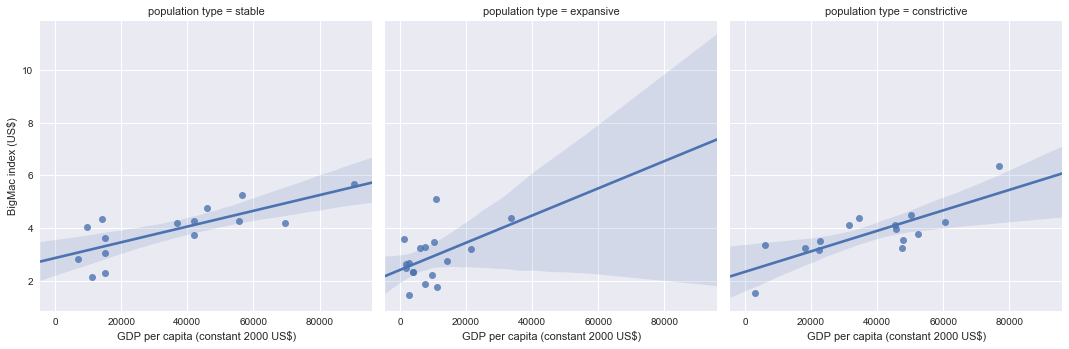

In [19]:
# g = sns.lmplot(x="Value", y="dollar_price", row="population type", data=merged_df2)
g = sns.lmplot(x="Value", y="dollar_price", col="population type", data=merged_df2)
g.set_xlabels("GDP per capita (constant 2000 US$)")
g.set_ylabels("BigMac index (US$)")

#plt.savefig("Section_04_categorical_scatter_col.png", dpi=300)
plt.show()

###  hue grids

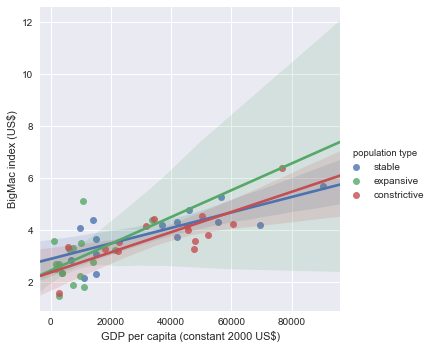

In [20]:
# Color-coded scatter plot (hue="population type")
g = sns.lmplot(x="Value", y="dollar_price", hue="population type", data=merged_df2)
g.set_xlabels("GDP per capita (constant 2000 US$)")
g.set_ylabels("BigMac index (US$)")  

# plt.savefig("Section_04_categorical_scatter_hue.png", dpi=300)
plt.show()

# Strip, Box, and Violin Plot

___Strip Plot is just a Scatter plot where x-axis represents a categorical variable___

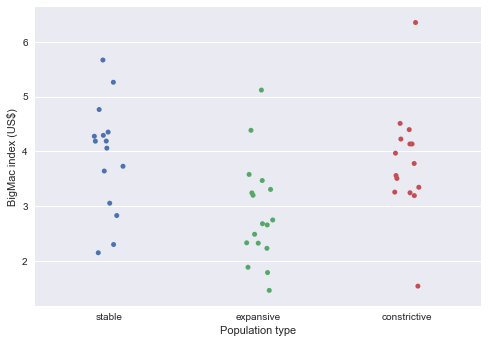

In [21]:
# Strip plot with jitter value
ax = sns.stripplot(x="population type", y="dollar_price", data=merged_df2, jitter=True)
ax.set_xlabel("Population type")
ax.set_ylabel("BigMac index (US$)")  

# plt.savefig("Section_04_categorical_strip.png", dpi=300)
plt.show()

___Box Plot___

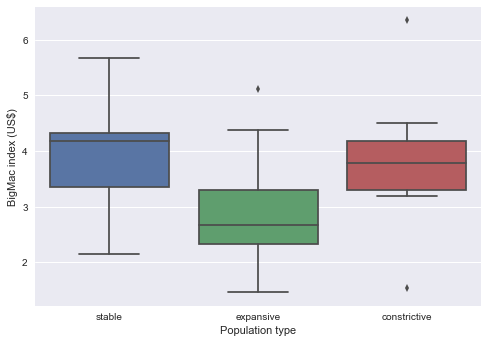

In [22]:
# Box plot
ax = sns.boxplot(x="population type", y="dollar_price", data=merged_df2)
ax.set_xlabel("Population type")
ax.set_ylabel("BigMac index (US$)")  

# plt.savefig("Section_04_categorical_box.png", dpi=300)
plt.show()

___Vionlin Plot___

In addition to Box Plot, Violin plot show the full estimated probability distribution, and detects the peak in the data

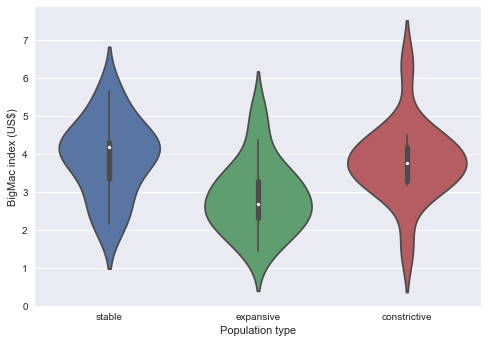

In [23]:
# Violin plot
ax = sns.violinplot(x="population type", y="dollar_price", data=merged_df2)
ax.set_xlabel("Population type")
ax.set_ylabel("BigMac index (US$)")  

#plt.savefig("Section_04_categorical_box.png", dpi=300)
plt.show()

___Mixed Plot: Box + Swarm___

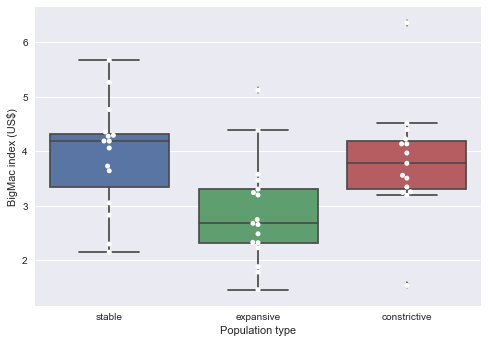

In [24]:
# Prepare a box plot
ax = sns.boxplot(x="population type", y="dollar_price", data=merged_df2)

# Overlay a strip plot on top of the same axes
sns.swarmplot(x="population type", y="dollar_price", data=merged_df2, color="w", ax=ax)
ax.set_xlabel("Population type")
ax.set_ylabel("BigMac index (US$)")  

#plt.savefig("Section_04_categorical_box2.png", dpi=300)
plt.show()